Myriad results comparing script A reduced via Sequence of rotations (denoted as standard/std approach)
and LCU

(In both cases classically applied)

In [1]:
import numpy as np
import os
import ast

%matplotlib inline
import matplotlib.pyplot as plt
import pickle

In [10]:
working_dir = os.getcwd()
parent_dir = os.path.dirname(working_dir)
data_dir = os.path.join(parent_dir, 'data')


data_hamiltonians_file = os.path.join(data_dir, 'hamiltonians.txt')


fullH_sub_dir = os.path.join(data_dir, 'fullHamiltonians')
fullH_sub_JW_dir = os.path.join(fullH_sub_dir, 'JW')


In [14]:
with open(data_hamiltonians_file, 'r') as input_file:
    tapered_hamiltonians = ast.literal_eval(input_file.read())
    
tapered_H_size ={}
dict_keys = list(tapered_hamiltonians.keys())
for mol_key in dict_keys:
    if mol_key == 'H2-O1_STO-3G_singlet':
        tapered_H_size[mol_key] = {'N_terms':len(tapered_hamiltonians[mol_key][2]), 'N_qubits':tapered_hamiltonians[mol_key][1]}
    else:
        del tapered_hamiltonians[mol_key]
# tapered_H_size

In [16]:
for key in tapered_H_size.keys():
    print(f"{key: <25}     No. terms:  {tapered_H_size[key]['N_terms']:<10.0f} No. qubits:  {tapered_H_size[key]['N_qubits']:<5.0f}")

H2-O1_STO-3G_singlet          No. terms:  1035       No. qubits:  10   


In [6]:
def Convert_full_H_to_dict(file_path_with_name):
    
    # function to convert .oplist file to dictionary!
    
    CONVERSION_DICT = {
                        0 : 'I',
                        1: 'X',
                        2: 'Y',
                        3: 'Z'
                        }
    
    with open(file_path_with_name,'rb') as infile:
        data = pickle.load(infile,encoding='latin1')
    
    Hamiltonian = {}
    for coeff, P_str_list in data:
        P_word = ''.join([CONVERSION_DICT[P_key] for P_key in P_str_list])
        Hamiltonian[P_word]= np.real(coeff)
     
    return Hamiltonian

In [20]:
# molecule names in hamiltonians and hamiltonians before tapering are different
# requires using regular expressions to select correct terms
# done below (code replaces pre-tapered hamiltonian names with naming done by Will!)

import re

full_hamiltonians_dict={}
for filename in os.listdir(fullH_sub_JW_dir):
    if filename.endswith('.oplist'):
        filename_with_ext = filename[:-7]
        
        if filename_with_ext in ['H2-O1_STO-3G_singlet_H2OH2O']:
            for mol_name in tapered_hamiltonians.keys():
                if bool(re.match(f'^.*{mol_name}.*$', filename_with_ext)): # wildcard at front and wildcard at end
    #                 print(filename_with_ext)
    #                 print(mol_name)
    #                 print('')
                    file = os.path.join(fullH_sub_JW_dir, filename)
                    H = Convert_full_H_to_dict(file)
                    full_hamiltonians_dict[mol_name] = H

In [22]:
## check keys match!
sorted(list(full_hamiltonians_dict.keys())) == sorted(list(tapered_hamiltonians.keys()))

True

In [23]:
full_H_size ={}
for mol_key in full_hamiltonians_dict.keys():
    if mol_key == 'H2-O1_STO-3G_singlet':
        full_H_size[mol_key] = {'N_terms':len(full_hamiltonians_dict[mol_key]),
                                   'N_qubits':len(list(full_hamiltonians_dict[mol_key].keys())[0])}
full_H_size

{'H2-O1_STO-3G_singlet': {'N_terms': 1086, 'N_qubits': 14}}

In [24]:
# full_H_size = {mol_key: len(full_hamiltonians_dict[mol_key]) for mol_key in full_hamiltonians_dict}

for key in tapered_H_size.keys():
    print(f"{key: <25}     No. terms orig:  {full_H_size[key]['N_terms']:<5.0f}  No. terms tapering:  {tapered_H_size[key]['N_terms']:<5.0f} tap_vs_orig_qubits: {tapered_H_size[key]['N_qubits']:<2.0f} vs {full_H_size[key]['N_qubits']:<2.0f}")

H2-O1_STO-3G_singlet          No. terms orig:  1086   No. terms tapering:  1035  tap_vs_orig_qubits: 10 vs 14


In [25]:
## import LCU results
output_dir = os.path.join(parent_dir, 'Pickle_out')

myriad_LCU_results = {}
for filename in os.listdir(output_dir):
    if (filename.endswith('.pickle') and filename.startswith('LCU_CS_VQE_exp')):
        file_path = os.path.join(output_dir, filename) 
        mol_name = filename[40:-8]
        if mol_name == 'H2-O1_STO-3G_singlet':
            with open(file_path,'rb') as infile:
                data = pickle.load(infile)

            myriad_LCU_results[mol_name] = data[mol_name]

myriad_LCU_results

{'H2-O1_STO-3G_singlet': [-83.92870248174707,
  [-83.15929536769288,
   -83.87422390061545,
   -83.87959838666484,
   -83.88315847347808,
   -83.89785356785995,
   -83.91205889216397,
   -83.91813131301501,
   -83.9276170395122,
   -83.92862837750994,
   -83.928653541029,
   -83.92870248174663],
  [0.7694071140541894,
   0.05447858113161885,
   0.04910409508222813,
   0.04554400826899041,
   0.030848913887112417,
   0.016643589583097196,
   0.010571168732056435,
   0.0010854422348671733,
   7.410423712883585e-05,
   4.894071805949807e-05,
   4.405364961712621e-13],
  [9, 2, 4, 0, 3, 6, 5, 1, 8, 7]]}

In [26]:
## import standard results
output_dir = os.path.join(parent_dir, 'Pickle_out')

myriad_std_results = {}
for filename in os.listdir(output_dir):
    if (filename.endswith('.pickle') and filename.startswith('standard_CS_VQE_exp')):
        file_path = os.path.join(output_dir, filename) 
        mol_name = filename[45:-8]
        if mol_name == 'H2-O1_STO-3G_singlet':
            with open(file_path,'rb') as infile:
                data = pickle.load(infile)

            myriad_std_results[mol_name] = data[mol_name]

myriad_std_results

{'H2-O1_STO-3G_singlet': [-83.92870248174707,
  [-83.87422390061542,
   -83.87422390061542,
   -83.87959838666467,
   -83.88315847347775,
   -83.89785356786,
   -83.91205889216367,
   -83.9181313130144,
   -83.92761703951149,
   -83.9286283775095,
   -83.9286535410287,
   -83.92870248174651],
  [0.054478581131647275,
   0.054478581131647275,
   0.04910409508239866,
   0.04554400826931726,
   0.030848913887069784,
   0.016643589583395624,
   0.010571168732667502,
   0.001085442235577716,
   7.410423756937234e-05,
   4.894071837213687e-05,
   5.542233338928781e-13],
  [2, 9, 4, 0, 3, 5, 6, 1, 8, 7]]}

### combined results 

In [28]:
import sys
sys.path.insert(1, parent_dir)
import cs_vqe as c
import cs_vqe_with_LCU as c_LCU

from copy import deepcopy as copy
import tqdm
from tqdm.notebook import tqdm

In [29]:
STANDARD_RESULTS={}
for key in tqdm(myriad_std_results.keys(), ascii=True, desc='getting standard CS-VQE results'):

    ham_noncon = tapered_hamiltonians[key][3]
    ep_state = [list(tapered_hamiltonians[key][5][1]), list(tapered_hamiltonians[key][5][2])] # ground state of noncontextual Ham
    ham = tapered_hamiltonians[key][2]

    model = c.quasi_model(ham_noncon)
    fn_form = c.energy_function_form(ham_noncon, model)

    N_qubits_tapered = tapered_hamiltonians[key][1]
    N_qubits_original_H = full_H_size[key]['N_qubits']
    
    order= copy(myriad_std_results[key][-1]) # <-- order specified from greedy run by Will
    qubit_removal_order=copy(order)
    
    reduced_Con_hamiltonians = c.get_reduced_hamiltonians(ham ,model, fn_form, ep_state, order)
    
    gs_energy_hamilt = tapered_hamiltonians[key][4]
    gs_energy_cs_vqe = myriad_std_results[key][0]
    if gs_energy_hamilt!=gs_energy_cs_vqe:
        raise ValueError('ground state energy mismatch')
    
    STANDARD_RESULTS[key] = {
                                'N_qubits_tapered': N_qubits_tapered,
                                'N_qubits_original_H': N_qubits_original_H,
        
                                'CS_VQE_energy_results': myriad_std_results[key][1],
                                'CS_VQE_error_results': myriad_std_results[key][2],
                                'FCI':tapered_hamiltonians[key][4],                         
                                'gstate_noncon':tapered_hamiltonians[key][5], 
                                'Contextual_Hamiltonian_list': reduced_Con_hamiltonians, #ham_out,   
#                                 'non_Contextual_H': conv_scr.Get_Openfermion_Hamiltonian(ham_noncon),# ham_noncon_out, 
                                'qubit_removal_order':qubit_removal_order
                             }
    
    
    
LCU_RESULTS={}
for key in tqdm(myriad_LCU_results.keys(), ascii=True, desc='getting LCU CS-VQE results'):

    ham_noncon = tapered_hamiltonians[key][3]
    ep_state = [list(tapered_hamiltonians[key][5][1]), list(tapered_hamiltonians[key][5][2])] # ground state of noncontextual Ham
    ham = tapered_hamiltonians[key][2]

    model = c.quasi_model(ham_noncon)
    fn_form = c.energy_function_form(ham_noncon, model)

    N_qubits_tapered = tapered_hamiltonians[key][1]
    N_qubits_original_H = full_H_size[key]['N_qubits']
    
    order= copy(myriad_LCU_results[key][-1]) # <-- order specified from greedy run by Will
    qubit_removal_order=copy(order)
    
    
    N_index=0
    reduced_Con_hamiltonians = c_LCU.get_reduced_hamiltonians_LCU(ham,model, fn_form, ep_state, order, 
                                                                  N_qubits_tapered, N_index)
    
    gs_energy_hamilt = tapered_hamiltonians[key][4]
    gs_energy_cs_vqe = myriad_LCU_results[key][0]
    if gs_energy_hamilt!=gs_energy_cs_vqe:
        raise ValueError('ground state energy mismatch')
    
    LCU_RESULTS[key] = {
                                'N_qubits_tapered': N_qubits_tapered,
                                'N_qubits_original_H': N_qubits_original_H,
        
                                'CS_VQE_energy_results': myriad_LCU_results[key][1],
                                'CS_VQE_error_results': myriad_LCU_results[key][2],
                                'FCI':tapered_hamiltonians[key][4],                         
                                'gstate_noncon':tapered_hamiltonians[key][5], 
                                'Contextual_Hamiltonian_list': reduced_Con_hamiltonians, #ham_out,   
#                                 'non_Contextual_H': conv_scr.Get_Openfermion_Hamiltonian(ham_noncon),# ham_noncon_out, 
                                'qubit_removal_order':qubit_removal_order
                             }

In [30]:
for key in LCU_RESULTS:
    print(key)

H2-O1_STO-3G_singlet


In [31]:
def plot_n_qubits_VS_n_terms(result_dict_LCU,result_dict_Std, mol_name, dpi=200):
    # https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    
    ## get total number of terms for each reduction
    H_sizes_LCU = [len(reducedH) for reducedH in result_dict_LCU[mol_name]['Contextual_Hamiltonian_list']]
    H_sizes_std =[len(reducedH) for reducedH in result_dict_Std[mol_name]['Contextual_Hamiltonian_list']]
    
    
    n_qubits = np.array([i for i in range(1+result_dict_LCU[mol_name]['N_qubits_tapered'])])
#     n_qubits = np.array([i for i in range(len(H_sizes_std))])
    
    width = 0.5  # the width of the bars
    fig, ax = plt.subplots(dpi=dpi)
    rects1 = ax.bar(n_qubits - width/2, H_sizes_std, width, label='standard')
    rects2 = ax.bar(n_qubits + width/2, H_sizes_LCU, width, label='LCU terms')

    ax.set_ylabel('Number of terms')
    ax.set_xlabel('Number of qubits')
    

#     tapered_N_terms = Nterms_tapered_H_dict[mol_name]
#     rects3 = ax.bar(n_qubits[-1] + width*1.5, tapered_N_terms, width, label='tapered H')
    
#     original_N_terms = Nterms_FULL_H_dict[mol_name]
#     rects4 = ax.bar(n_qubits[-1] + width*2.5, original_N_terms, width, label='original H')

    ####  second y axis!
    true_gs_energy = result_dict_LCU[mol_name]['FCI']
    CS_VQE_std_error = result_dict_LCU[mol_name]['CS_VQE_error_results']
    CS_VQE_LCU_errors = result_dict_Std[mol_name]['CS_VQE_error_results']
#     n_qubits = np.array([i for i in range(len(CS_VQE_LCU_errors))])
    
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(n_qubits,CS_VQE_std_error,color="blue",marker="o", label='CS_VQE std error')
    ax2.plot(n_qubits,CS_VQE_LCU_errors,color="red",marker="x", linestyle='--', label='CS_VQE LCU error')
    ax2.set_ylabel("Energy Error",color="black",fontsize=14)

    ax2.axhline(y=1.6e-3, color='black', linestyle='-', label='chemical accuracy')
    
    ax.set_title(mol_name)
    ax.set_xticks(n_qubits)
    ax.set_xticklabels(n_qubits)
    ax.legend()
    ax2.legend(loc='center left')
    fig.tight_layout()

    plt.show()
    print()
    
        # save the plot as a file
#     fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#                 format='jpeg',
#                 dpi=100,
#                 bbox_inches='tight')

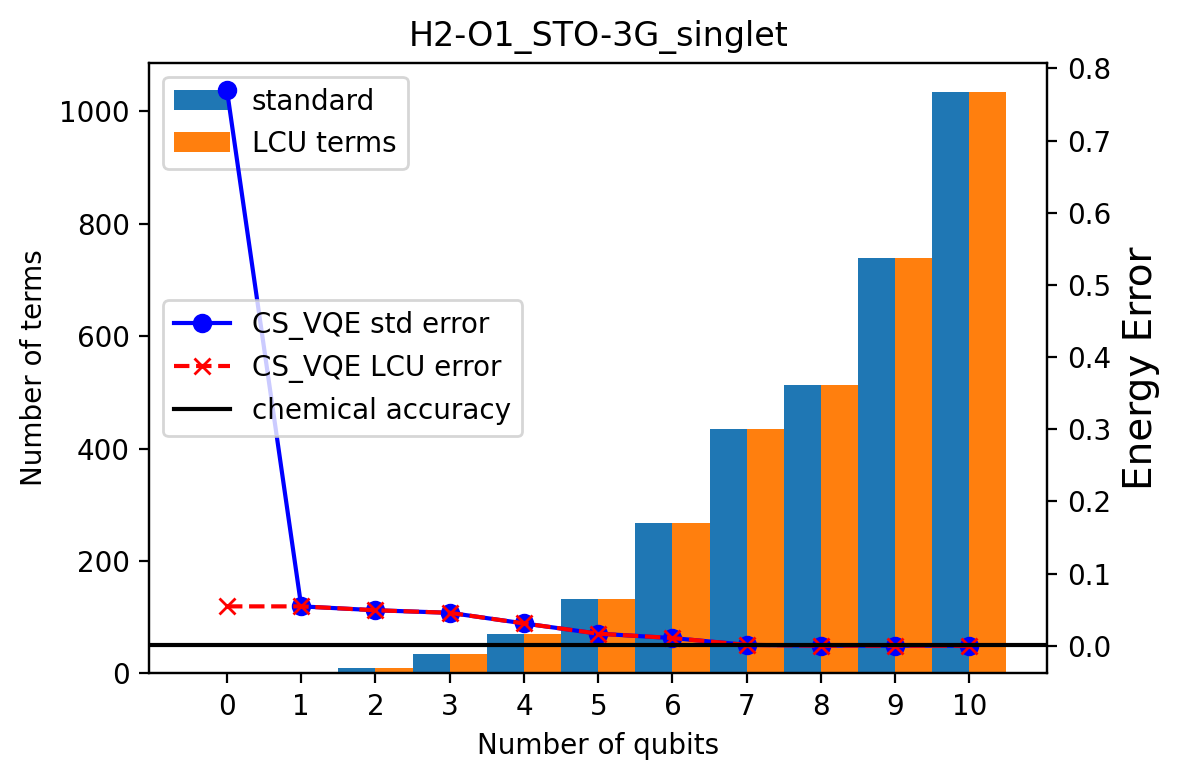

In [34]:
plot_n_qubits_VS_n_terms(LCU_RESULTS,STANDARD_RESULTS, 'H2-O1_STO-3G_singlet', dpi=200)

# Q Circuit sizes